In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import Normalizer , LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [17]:
#read dataset
df = pd.read_csv('/content/drive/MyDrive/ASDS/boston.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
datarowsSeries = [pd.Series([0.069,10,2.3,0,0.53,6.5,65.2,4.01,1,290,15,395,4.9,24],index=df.columns ),
                  pd.Series([40.69,50,2.7,0,0.9,6.9,65.6,4.5,1,330,55,435,5.3,24.7],index=df.columns ),
                  pd.Series([40.68,51,2.8,0,1,7,65.5,4.4,1,331,53,430,4.6,24.6],index=df.columns),
                  pd.Series([40.67,52,2.9,0,0.8,6.9,65.7,4.6,1,332,54,432,4.7,24.5],index=df.columns),
                  pd.Series([40.66,53,2.8,0,1.1,6.9,65.8,4.5,1,333,56,431,4.8,24.6],index=df.columns)
                  ]

In [19]:
df_boston=df.append(datarowsSeries,ignore_index=True)

<ipython-input-19-8581e66431be>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_boston=df.append(datarowsSeries,ignore_index=True)


In [ ]:
df_boston.shape

(511, 14)

In [ ]:
df_boston['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
1.0      25
2.0      24
8.0      24
7.0      17
Name: RAD, dtype: int64

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    float64
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    float64
 9   TAX      511 non-null    float64
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(14)
memory usage: 56.0 KB


In [ ]:
df_boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
506,0.069,10.0,2.3,0.0,0.53,6.5,65.2,4.01,1.0,290.0,15.0,395.0,4.9,24.0
507,40.690,50.0,2.7,0.0,0.90,6.9,65.6,4.50,1.0,330.0,55.0,435.0,5.3,24.7
508,40.680,51.0,2.8,0.0,1.00,7.0,65.5,4.40,1.0,331.0,53.0,430.0,4.6,24.6
509,40.670,52.0,2.9,0.0,0.80,6.9,65.7,4.60,1.0,332.0,54.0,432.0,4.7,24.5
510,40.660,53.0,2.8,0.0,1.10,6.9,65.8,4.50,1.0,333.0,56.0,431.0,4.8,24.6


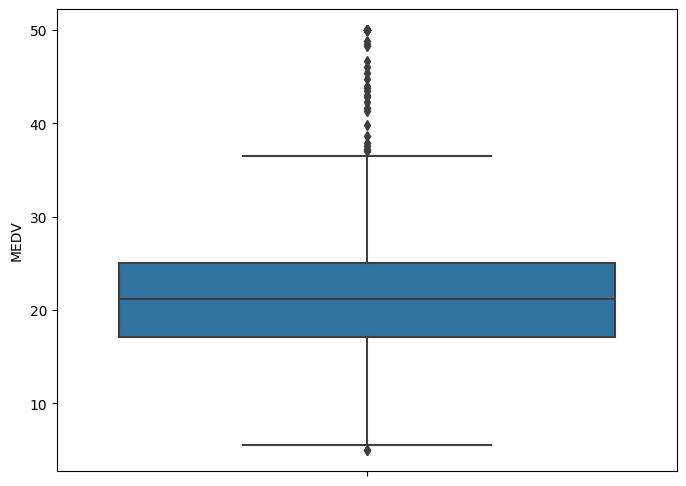

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y='MEDV',data=df_boston)
plt.show()

In [ ]:
from itertools import cycle
cycol = cycle('bgrcmy')


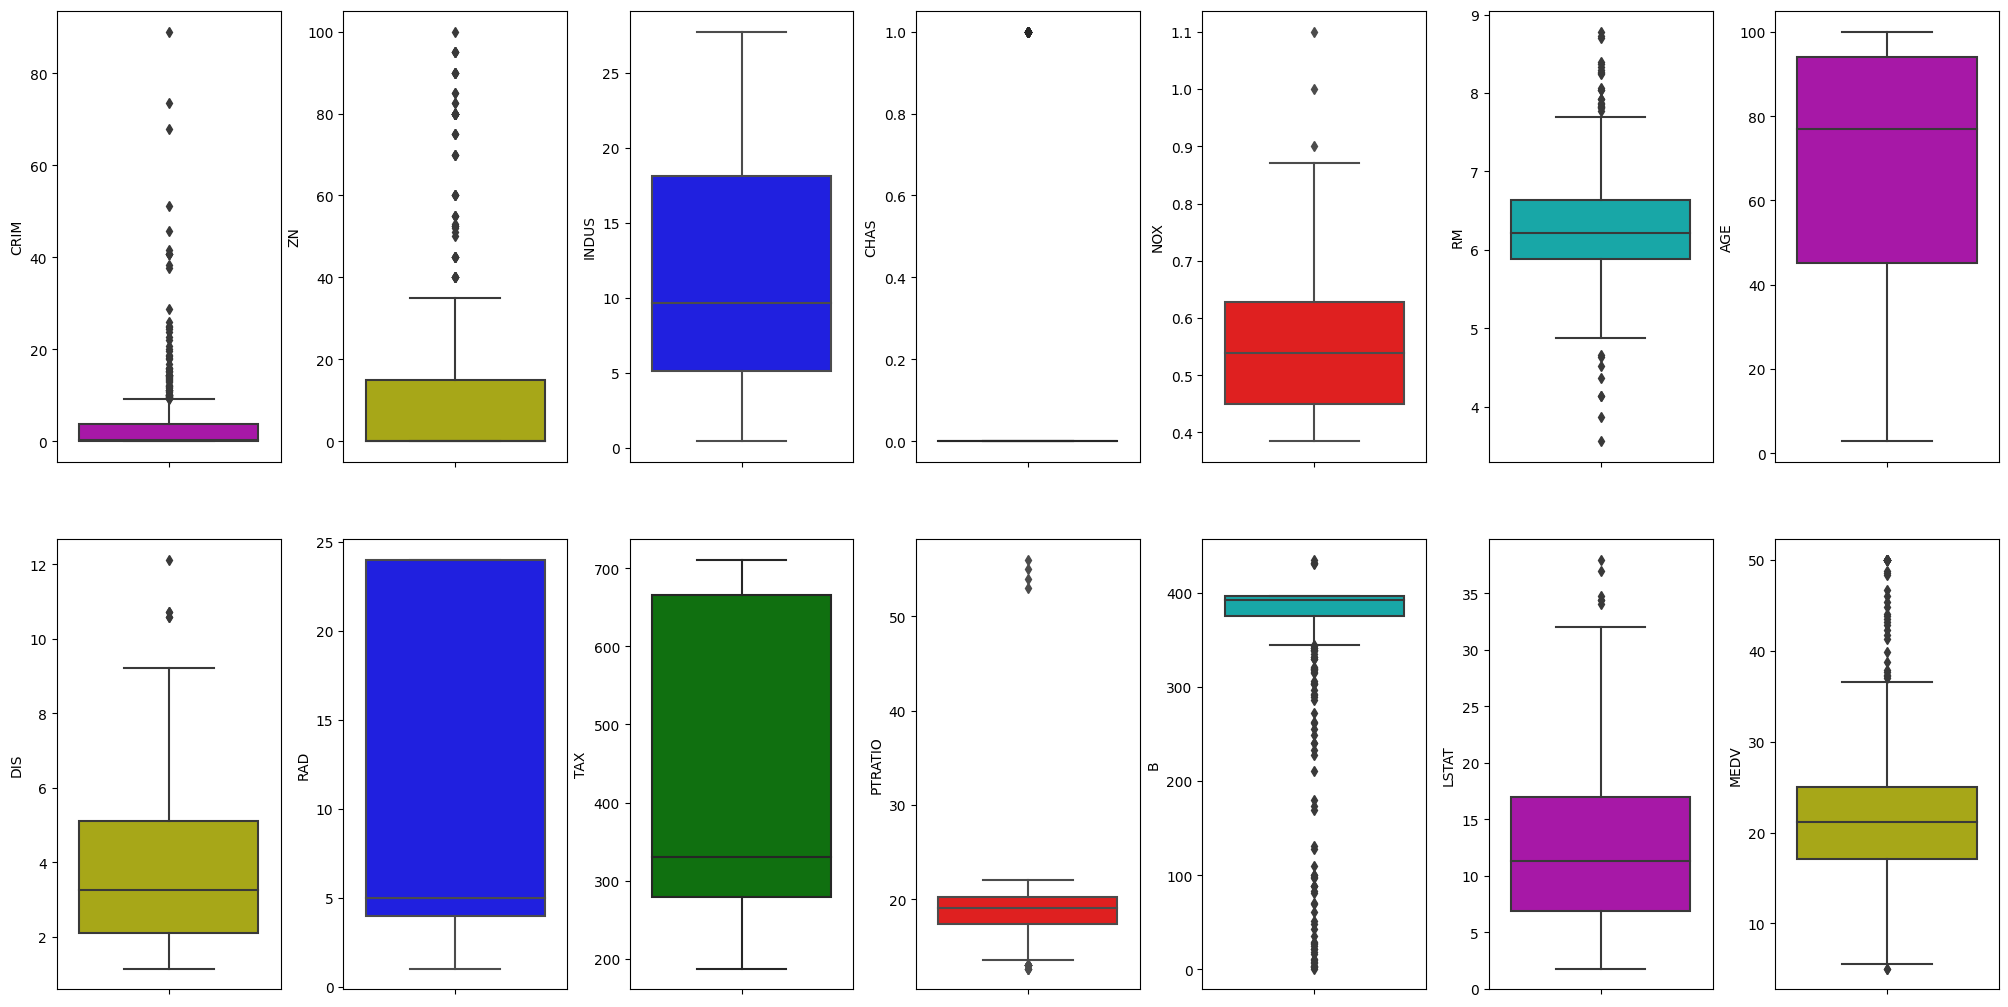

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.boxplot(y=k, data=df_boston, ax=axs[index], color=next(cycol))
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<ipython-input-47-5821a2cf827c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index], color=next(cycol))
<ipython-input-47-5821a2cf827c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index], color=next(cycol))
<ipython-input-47-5821a2cf827c>:5: UserWarning: 

`distplot`

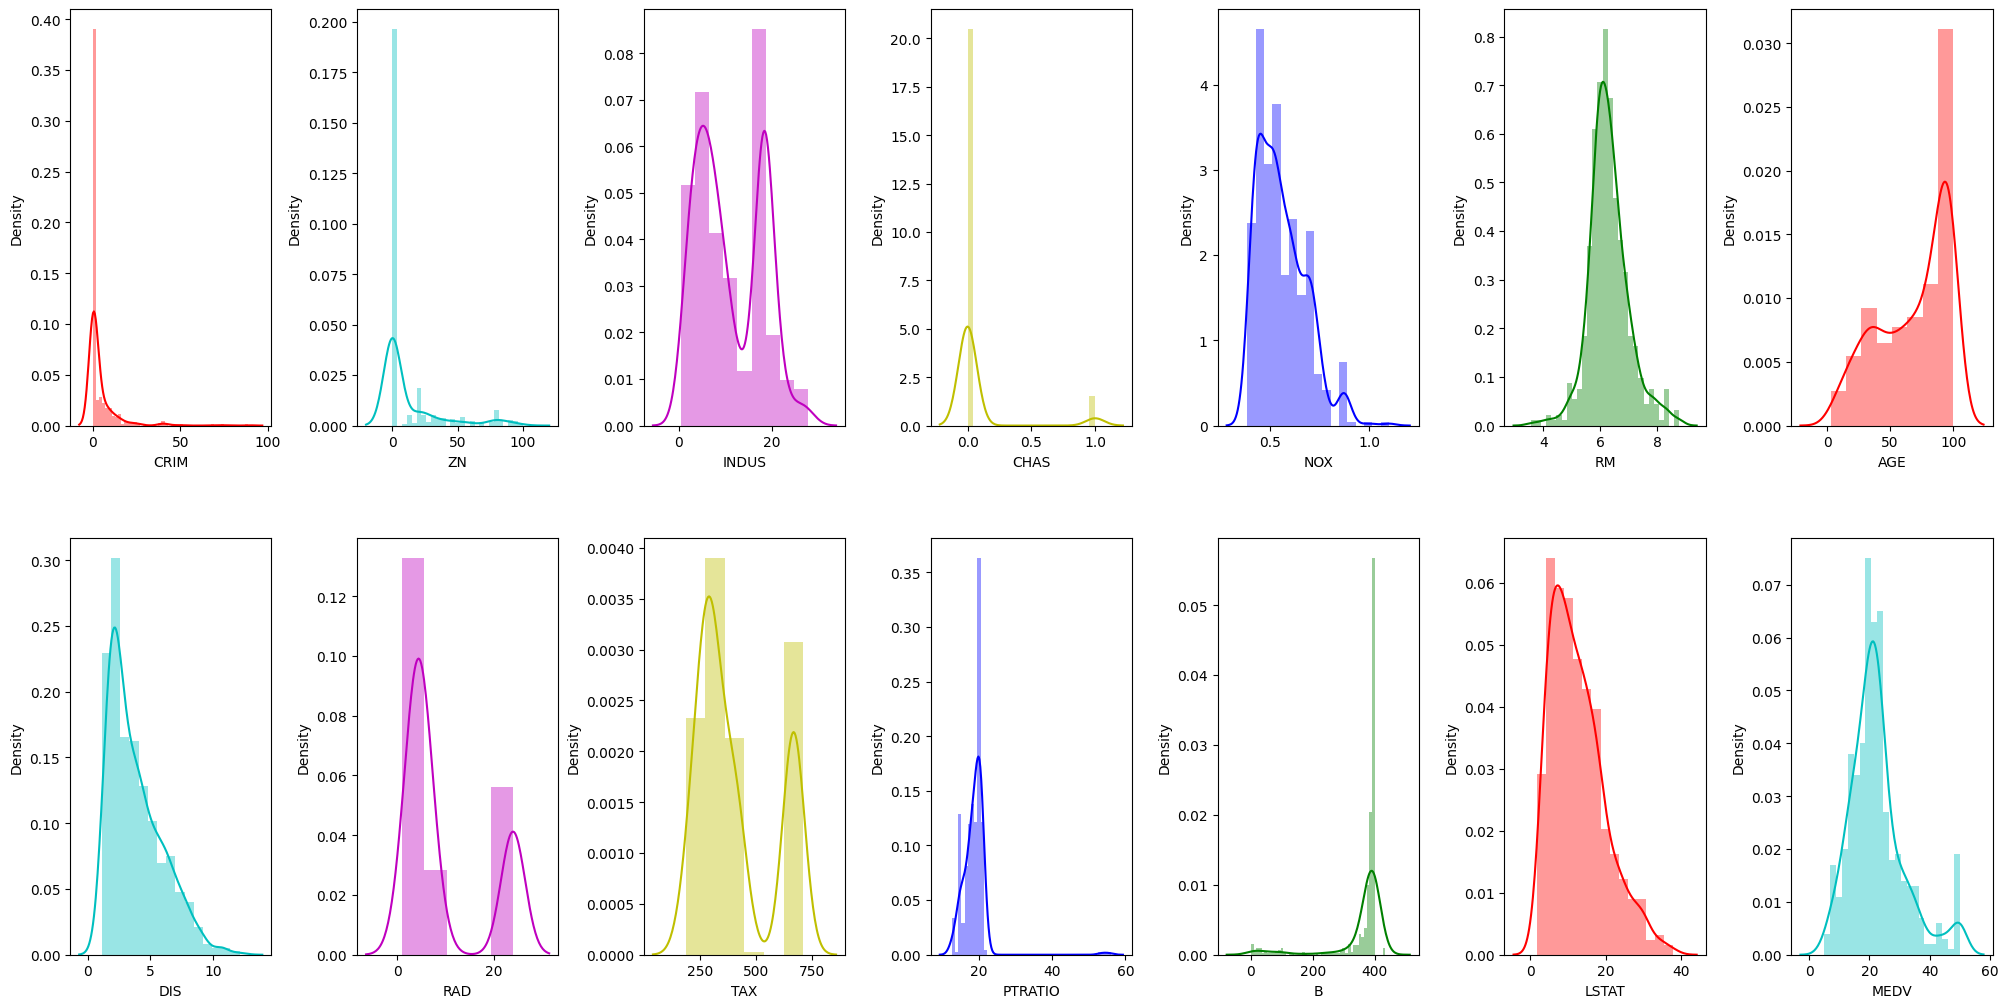

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.distplot(v, ax=axs[index], color=next(cycol))
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in df_boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_boston)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.50%
Column ZN outliers = 12.13%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.59%
Column RM outliers = 5.87%
Column AGE outliers = 0.00%
Column DIS outliers = 0.98%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.72%
Column B outliers = 15.85%
Column LSTAT outliers = 1.17%
Column MEDV outliers = 7.83%


In [ ]:
plt.boxplot(df_boston.CRIM)
plt.grid(False)
plt.title('Boxplot for per capita crime rate by town')
plt.show()

In [ ]:
sns.boxplot( y=df["CRIM"],color='green' )
plt.title('Boxplot for per capita crime rate by town')

Histogram

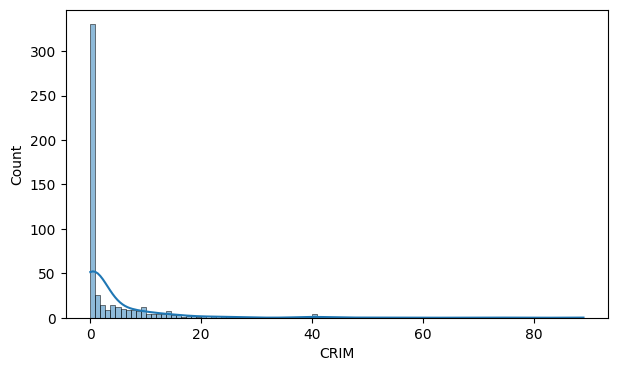

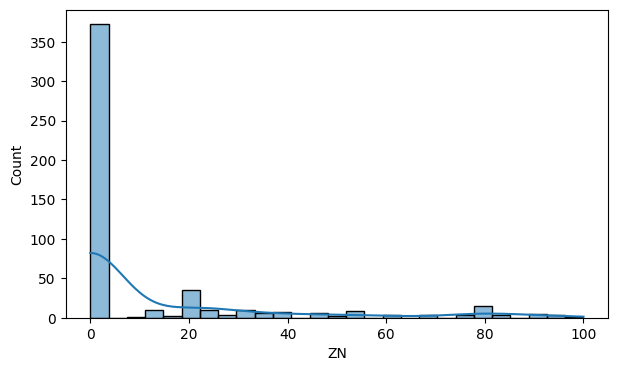

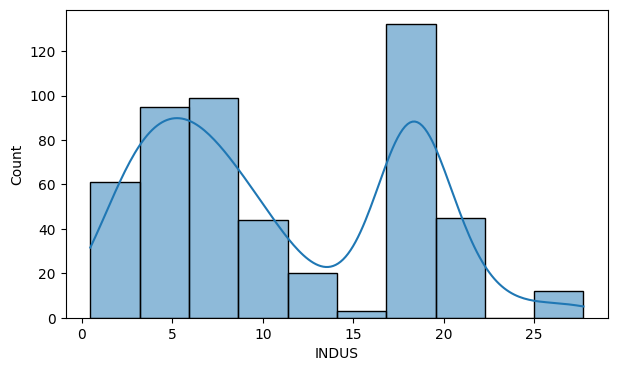

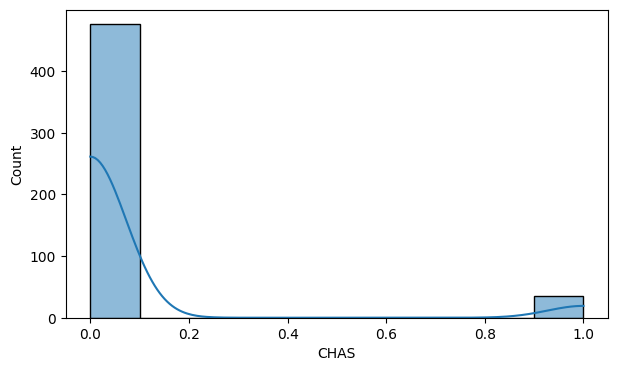

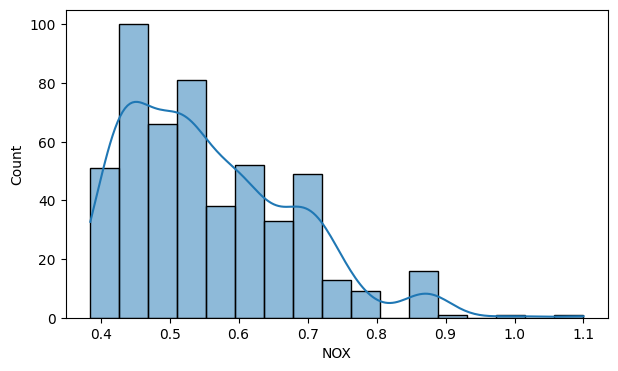

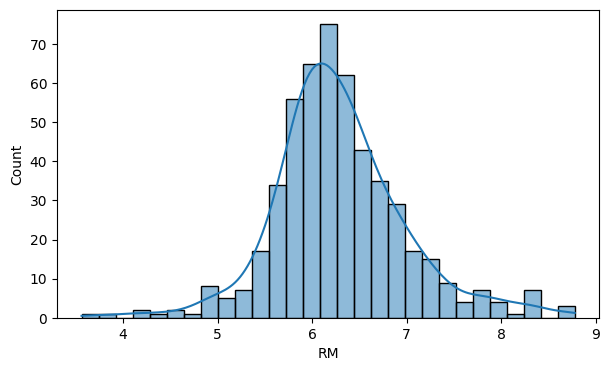

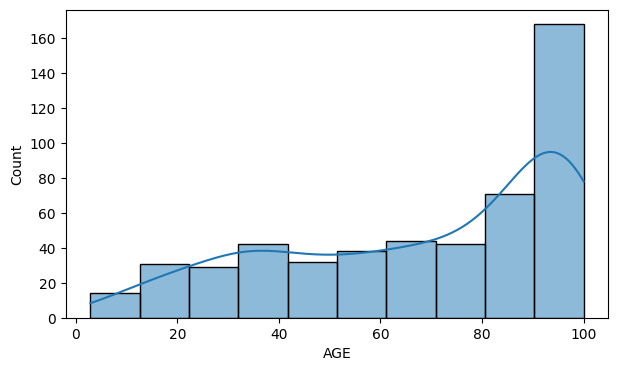

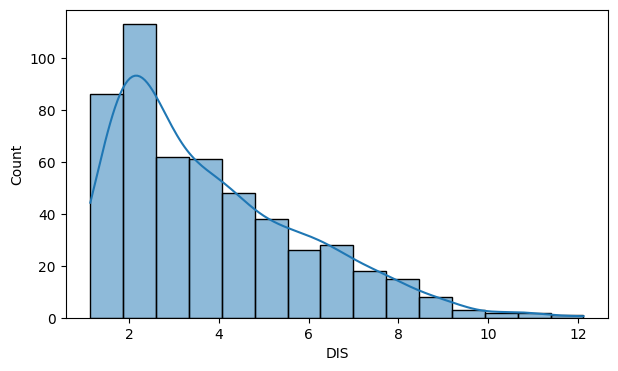

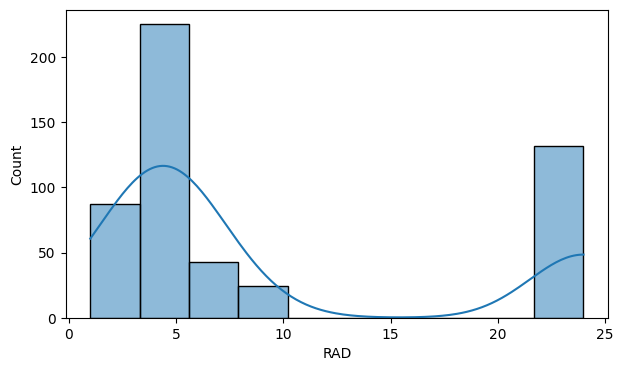

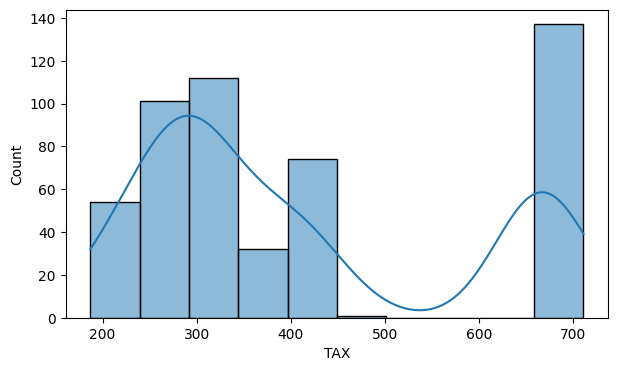

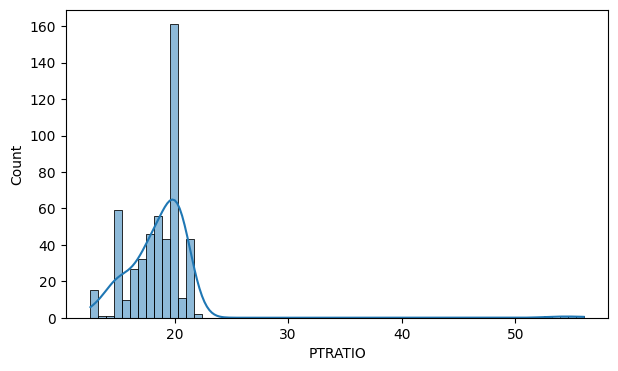

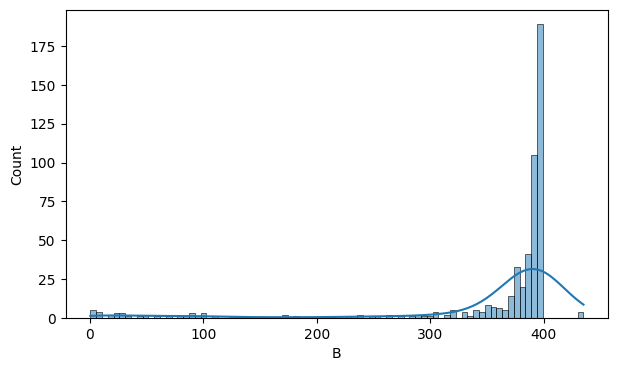

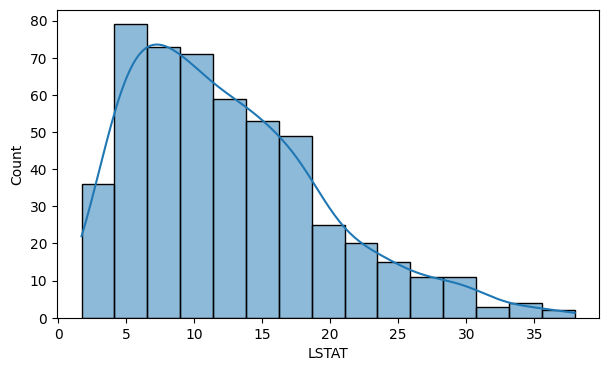

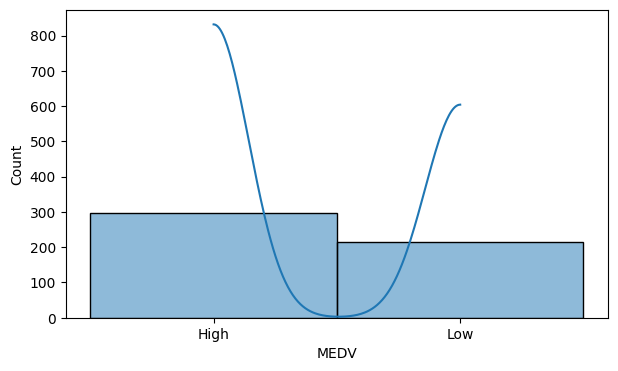

In [ ]:
for i in df_boston.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df_boston, x=i, kde = True)
    plt.show()

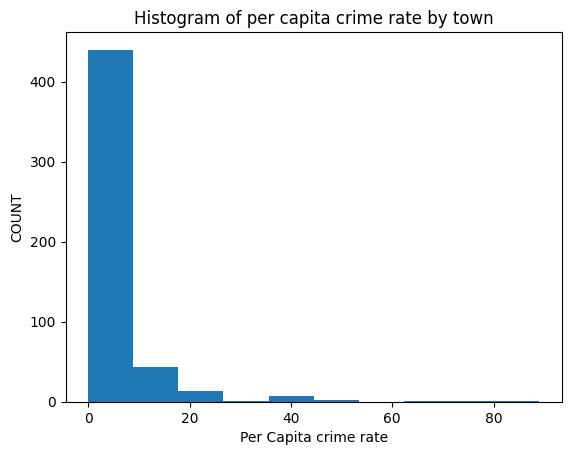

In [ ]:
plt.hist(x='CRIM', data=df_boston)
plt.xlabel('Per Capita crime rate')
plt.ylabel('COUNT')
plt.title('Histogram of per capita crime rate by town')
plt.grid(False)
plt.show()

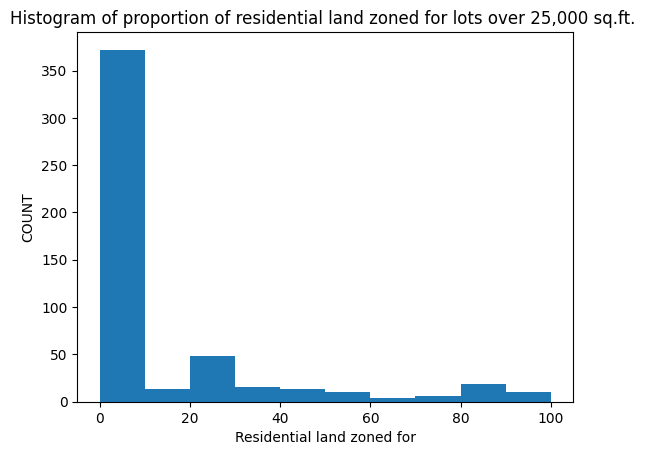

In [ ]:
plt.hist(x='ZN',data=df_boston)
plt.xlabel('Residential land zoned for')
plt.ylabel('COUNT')
plt.title('Histogram of proportion of residential land zoned for lots over 25,000 sq.ft. ')
plt.grid(False)
plt.show()

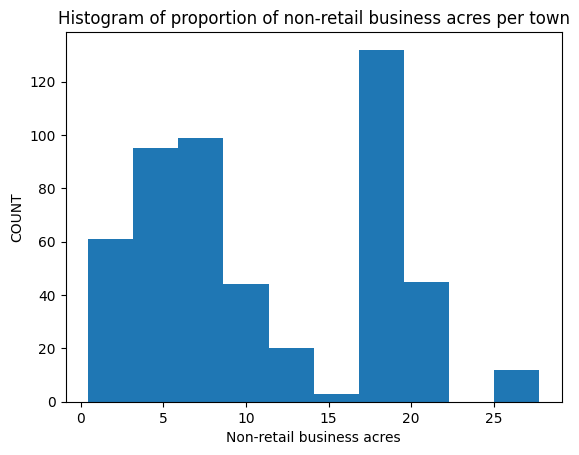

In [ ]:
plt.hist(x='INDUS',data=df_boston)
plt.xlabel('Non-retail business acres')
plt.ylabel('COUNT')
plt.title('Histogram of proportion of non-retail business acres per town')
plt.grid(False)
plt.show()

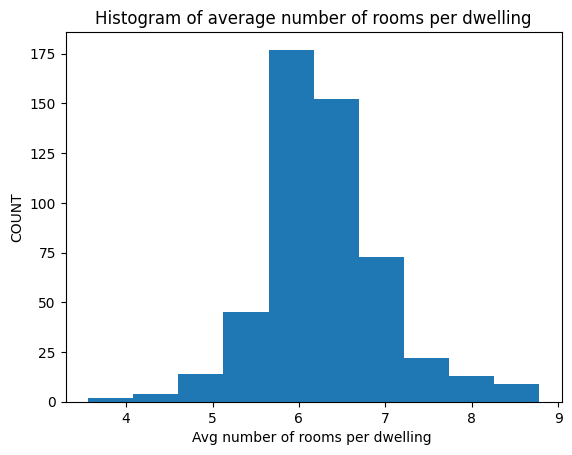

In [ ]:
plt.hist(x='RM',data=df_boston)
plt.xlabel('Avg number of rooms per dwelling ')
plt.ylabel('COUNT')
plt.title('Histogram of average number of rooms per dwelling')
plt.grid(False)
plt.show()

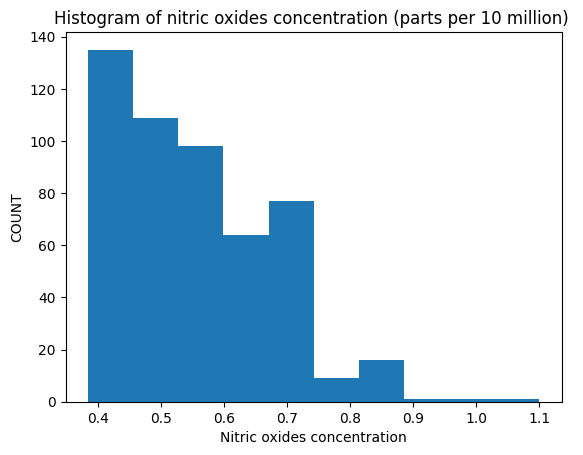

In [ ]:
plt.hist(x='NOX',data=df_boston)
plt.xlabel('Nitric oxides concentration')
plt.ylabel('COUNT')
plt.title('Histogram of nitric oxides concentration (parts per 10 million) ')
plt.grid(False)
plt.show()

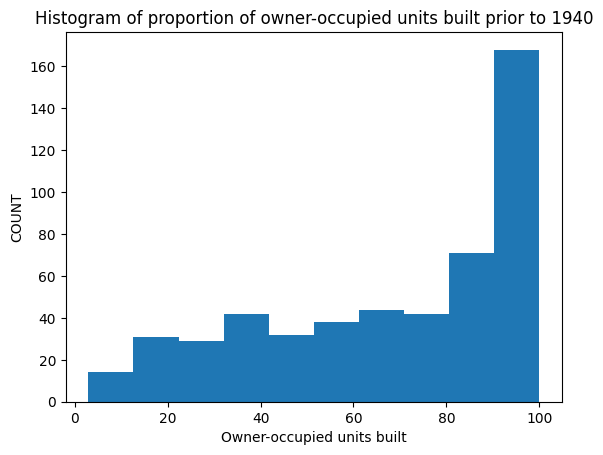

In [ ]:
plt.hist(x='AGE',data=df_boston)
plt.xlabel('Owner-occupied units built')
plt.ylabel('COUNT')
plt.title('Histogram of proportion of owner-occupied units built prior to 1940')
plt.grid(False)
plt.show()

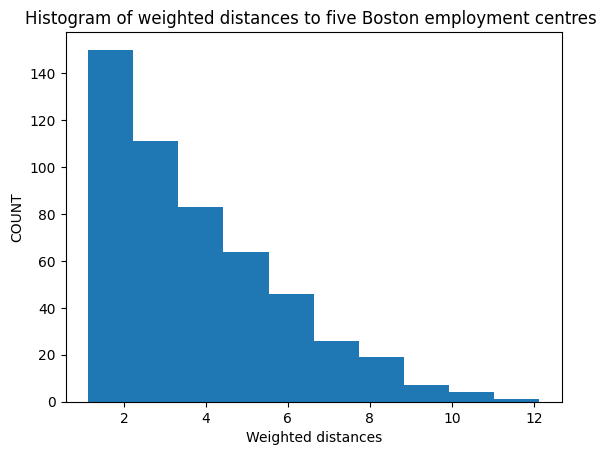

In [ ]:
plt.hist(x='DIS',data=df_boston)
plt.xlabel('Weighted distances')
plt.ylabel('COUNT')
plt.title('Histogram of weighted distances to five Boston employment centres ')
plt.grid(False)
plt.show()

In [ ]:
df_boston.mode()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,6.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


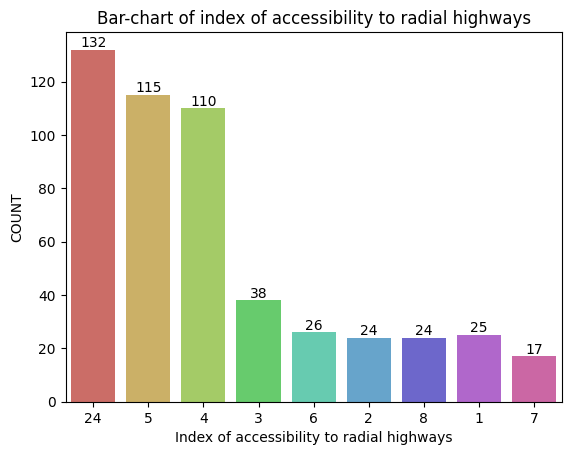

In [ ]:
ax=sns.countplot(data=df_boston, x='RAD', order=df.RAD.value_counts().index, palette = 'hls')
ax.bar_label(ax.containers[0])
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('COUNT')
plt.title('Bar-chart of index of accessibility to radial highways')
plt.show()

In [ ]:
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

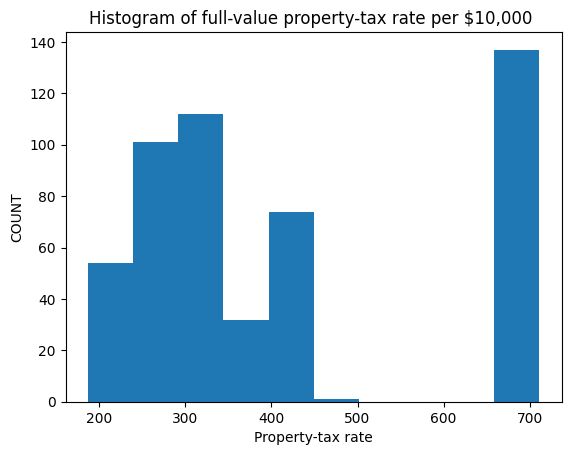

In [ ]:
plt.hist(x='TAX',data=df_boston)
plt.xlabel('Property-tax rate')
plt.ylabel('COUNT')
plt.title('Histogram of full-value property-tax rate per $10,000 ')
plt.grid(False)
plt.show()

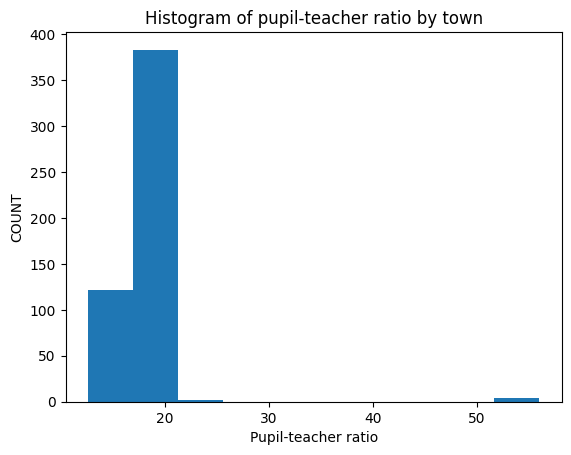

In [ ]:
plt.hist(x='PTRATIO',data=df_boston)
plt.xlabel('Pupil-teacher ratio')
plt.ylabel('COUNT')
plt.title('Histogram of pupil-teacher ratio by town')
plt.grid(False)
plt.show()

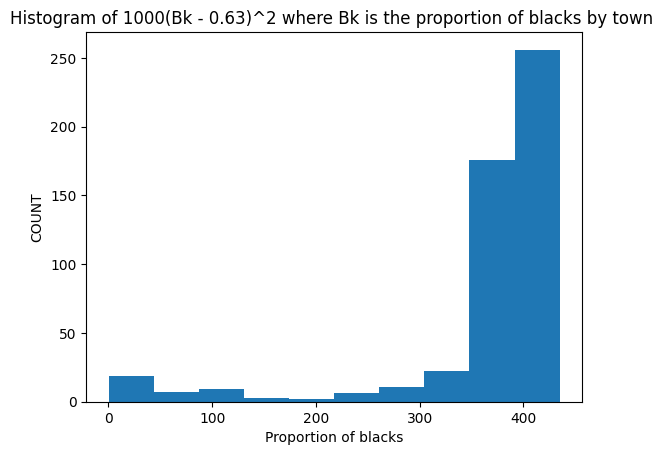

In [ ]:
plt.hist(x='B',data=df_boston)
plt.xlabel('Proportion of blacks')
plt.ylabel('COUNT')
plt.title('Histogram of 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town ')
plt.grid(False)
plt.show()

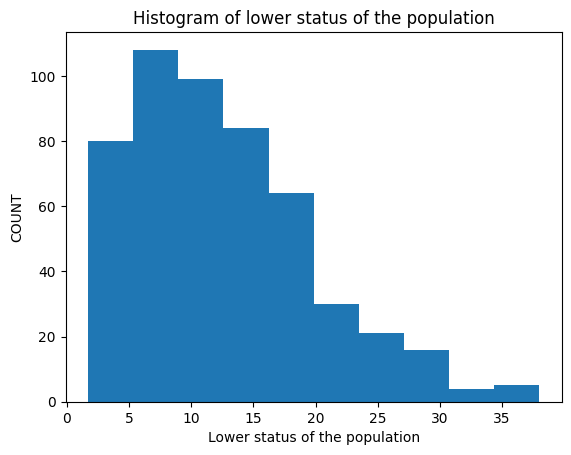

In [ ]:
plt.hist(x='LSTAT',data=df_boston)
plt.xlabel('Lower status of the population')
plt.ylabel('COUNT')
plt.title('Histogram of lower status of the population')
plt.grid(False)
plt.show()

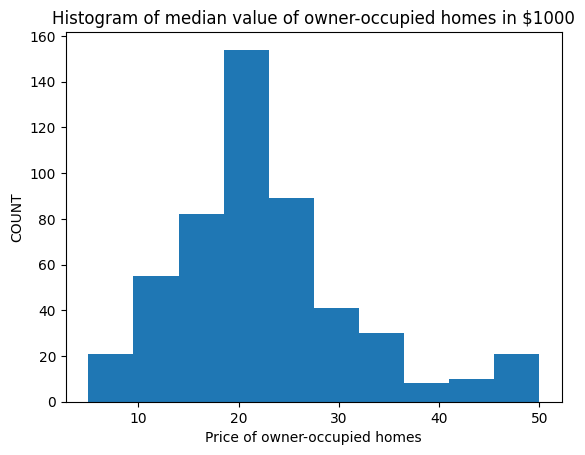

In [ ]:
plt.hist(x='MEDV',data=df_boston)
plt.xlabel('Price of owner-occupied homes')
plt.ylabel('COUNT')
plt.title('Histogram of median value of owner-occupied homes in $1000')
plt.grid(False)
plt.show()

In [ ]:
df_boston.CHAS.value_counts()

0.0    476
1.0     35
Name: CHAS, dtype: int64

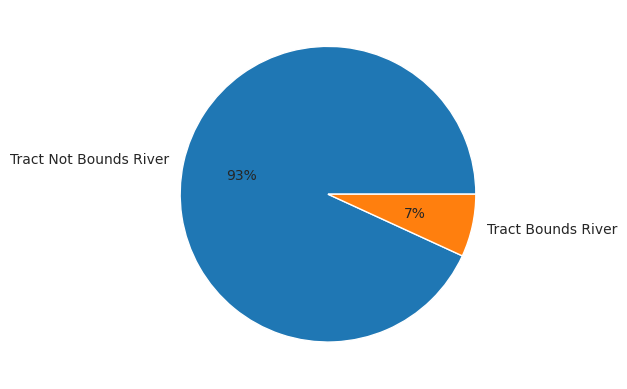

In [ ]:
keys=['Tract Not Bounds River', 'Tract Bounds River']
plt.pie(df_boston.CHAS.value_counts(), labels=keys,autopct='%.0f%%')
plt.show()

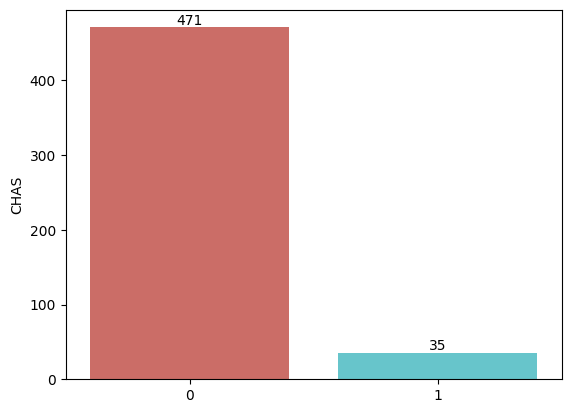

In [ ]:
ax=sns.barplot( x=[0,1],y=df["CHAS"].value_counts(),palette = 'hls')
ax.bar_label(ax.containers[0])
plt.show()

In [20]:
df_boston['MEDV']=np.where(df_boston['MEDV'] <= 20, 1,2)

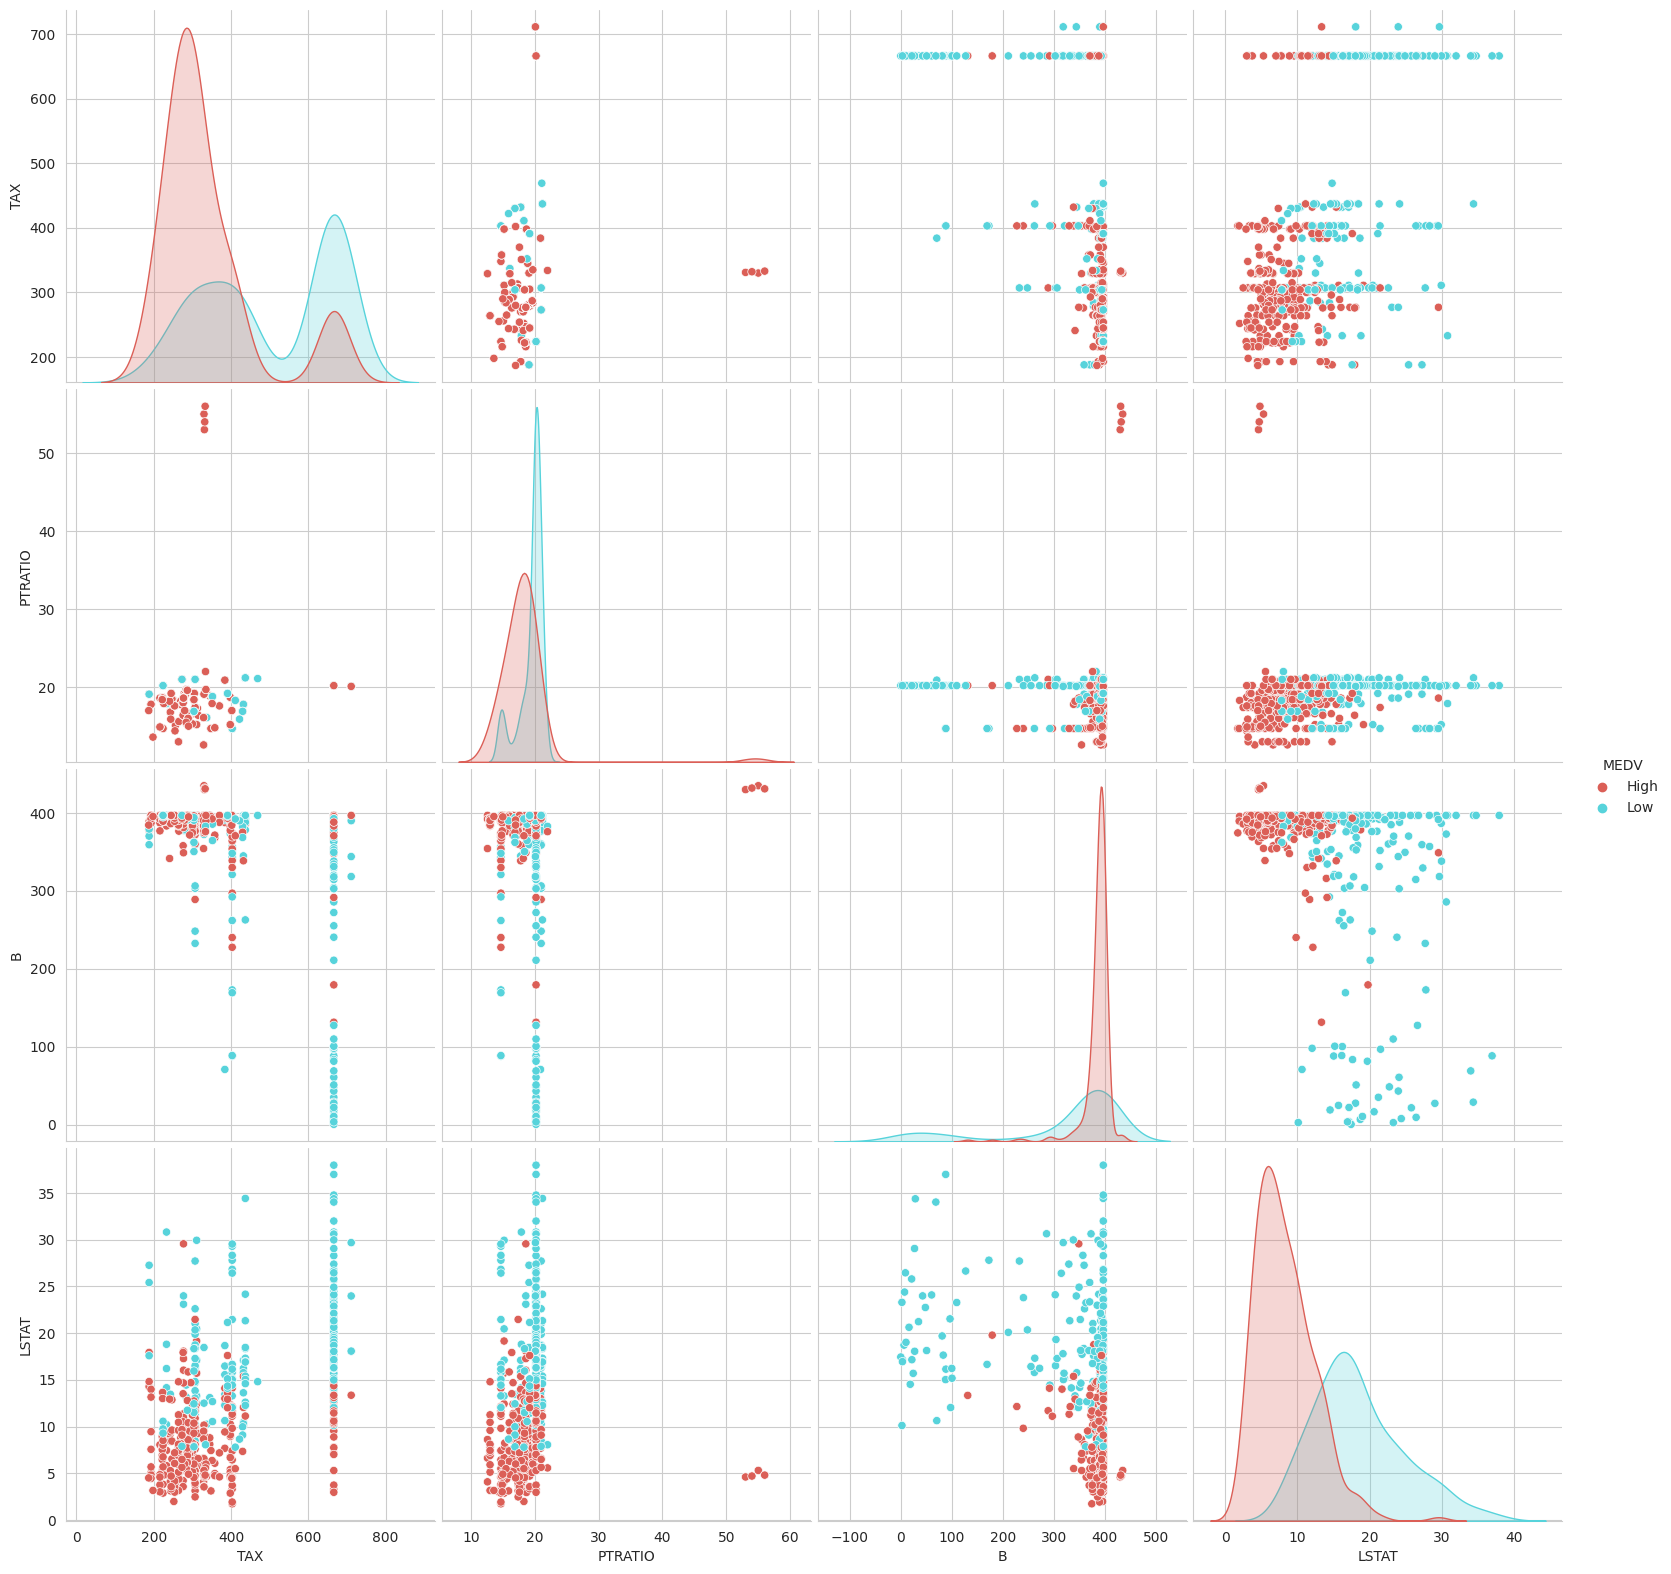

In [ ]:
#'Pairplots'
sns.set_style('whitegrid');
sns.pairplot(df_boston, vars=['TAX','PTRATIO'	,'B'	,'LSTAT'],hue = 'MEDV', height = 4, palette = 'hls')
plt.show()

In [ ]:
df_boston['MEDV']=df_boston['MEDV'].map({1:'Low', 2:'High'})

In [ ]:
#df_boston.rename(columns = {'MEDV':'PRICE'}, inplace = True)

In [ ]:
df_boston.MEDV.value_counts()

2    296
1    215
Name: PRICE, dtype: int64

In [ ]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

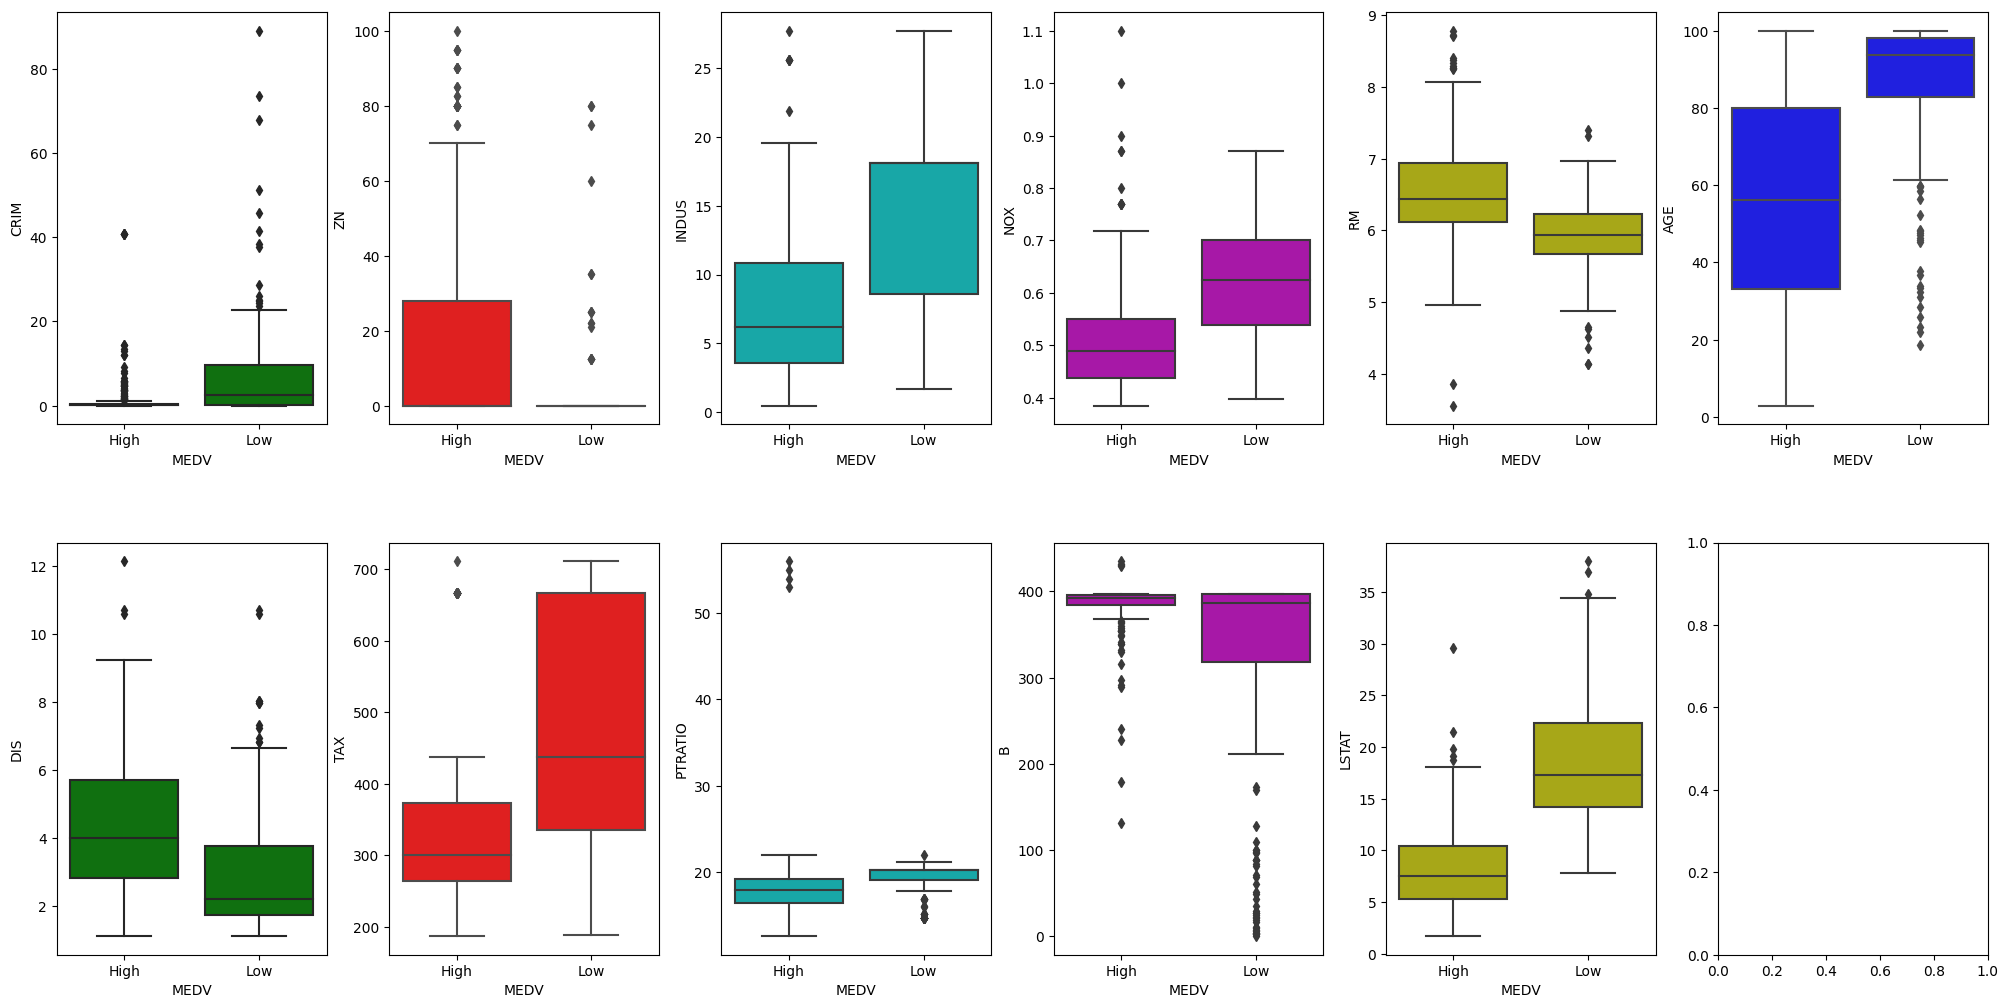

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
#index = 0
#axs = axs.flatten()
sns.boxplot(x='MEDV', y=df_boston['CRIM'], data=df_boston, ax=axs[0,0], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['ZN'], data=df_boston, ax=axs[0,1], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['INDUS'], data=df_boston, ax=axs[0,2], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['NOX'], data=df_boston, ax=axs[0,3], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['RM'], data=df_boston, ax=axs[0,4], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['AGE'], data=df_boston, ax=axs[0,5], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['DIS'], data=df_boston, ax=axs[1,0], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['TAX'], data=df_boston, ax=axs[1,1], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['PTRATIO'], data=df_boston, ax=axs[1,2], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['B'], data=df_boston, ax=axs[1,3], color=next(cycol))
sns.boxplot(x='MEDV', y=df_boston['LSTAT'], data=df_boston, ax=axs[1,4], color=next(cycol))
#index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: xlabel='MEDV', ylabel='LSTAT'>

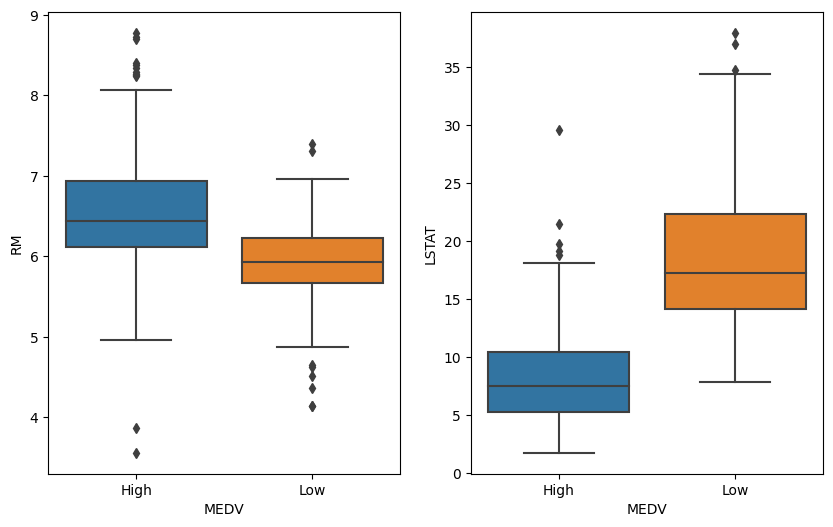

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(10, 6))

sns.boxplot(x='MEDV', y='RM', data=df_boston, ax=axs[0])

sns.boxplot(x='MEDV', y='LSTAT', data=df_boston, ax=axs[1])

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
df_boston.MEDV

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
506    NaN
507    NaN
508    NaN
509    NaN
510    NaN
Name: MEDV, Length: 511, dtype: object

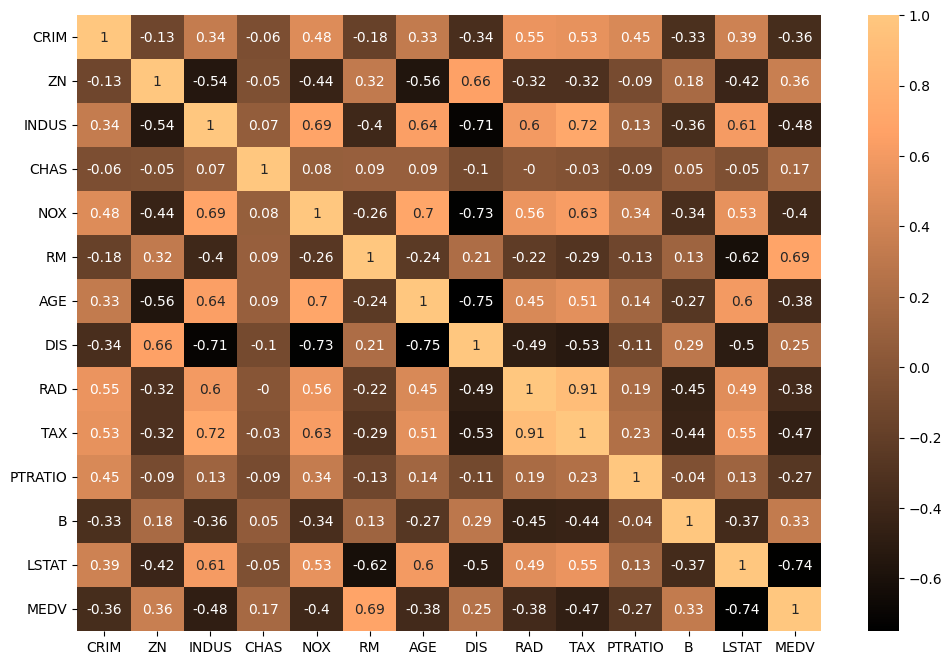

In [ ]:
plt.figure(figsize=(12,8))
correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='copper')
plt.yticks(rotation=0)
plt.show()

Visualizing the relationship between the features having significant correlations (> 0.7)

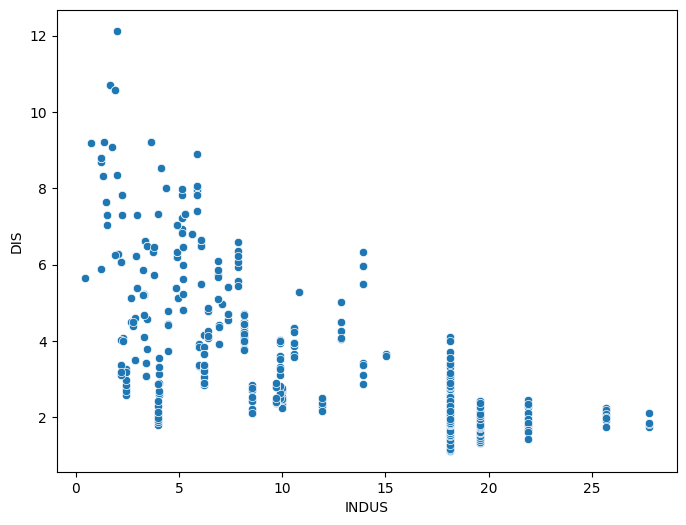

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='DIS', data=df_boston)
plt.show()

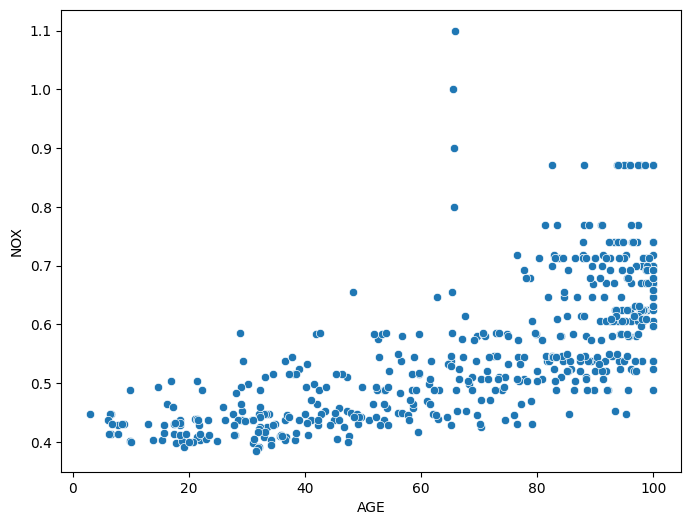

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='NOX', data=df_boston)
plt.show()

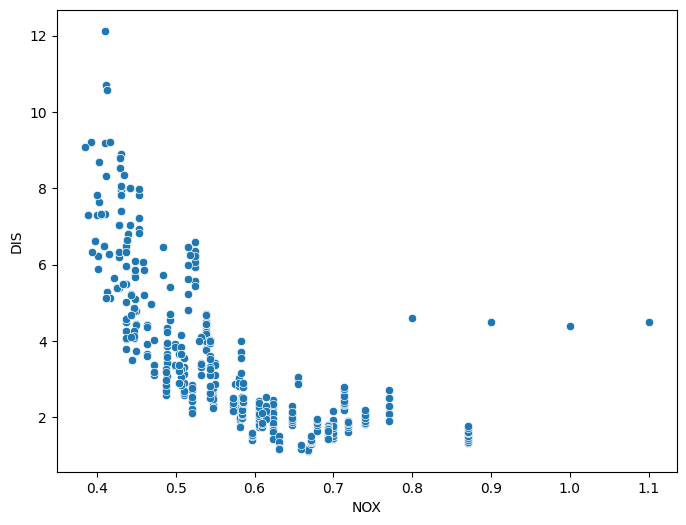

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='DIS', data=df_boston)
plt.show()

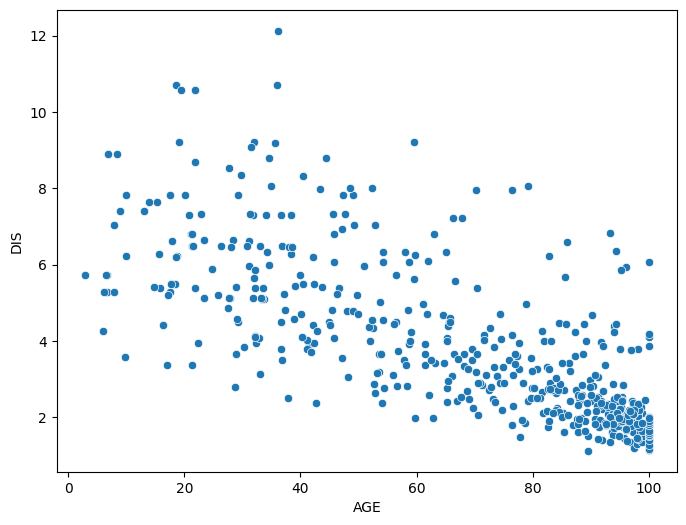

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='DIS', data=df_boston)
plt.show()

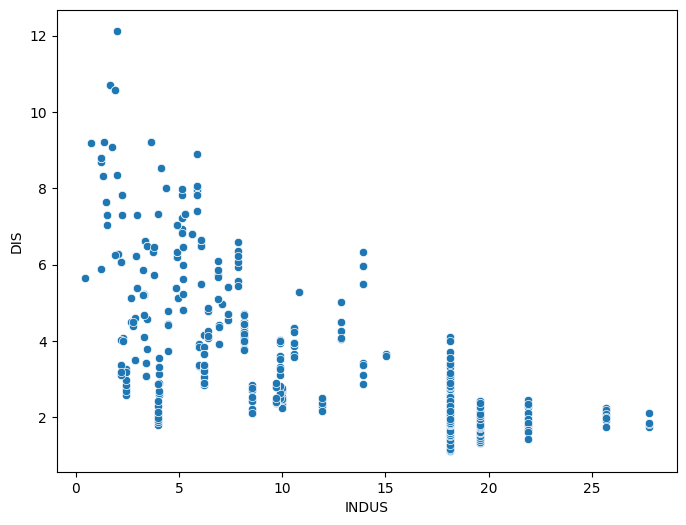

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='DIS', data=df_boston)
plt.show()

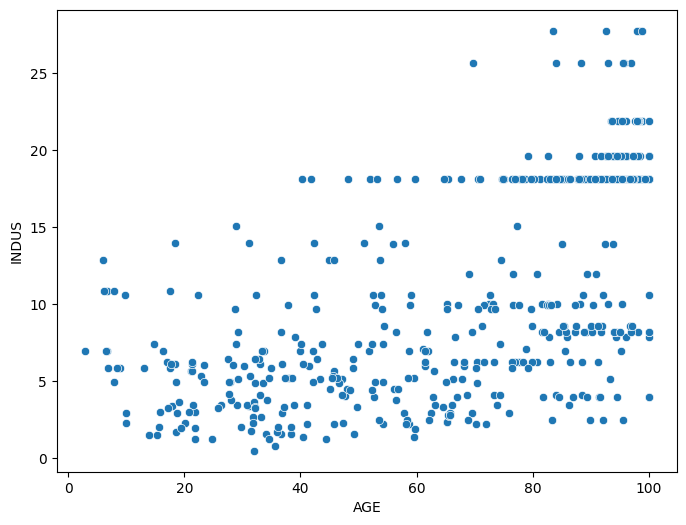

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='INDUS', data=df_boston)
plt.show()

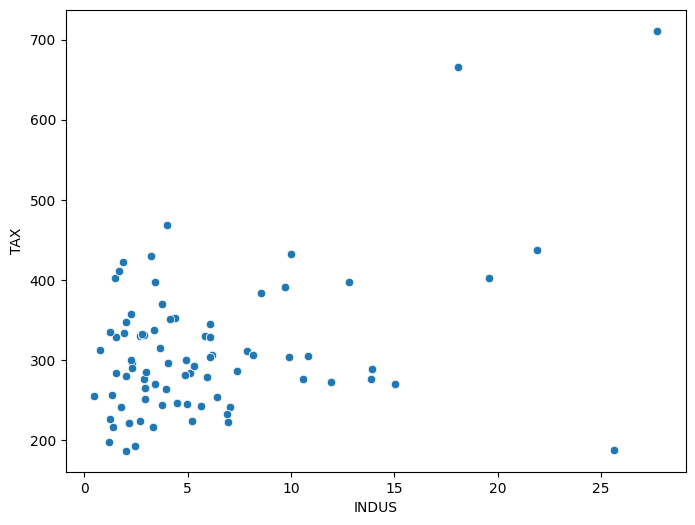

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='TAX', data=df_boston)
plt.show()

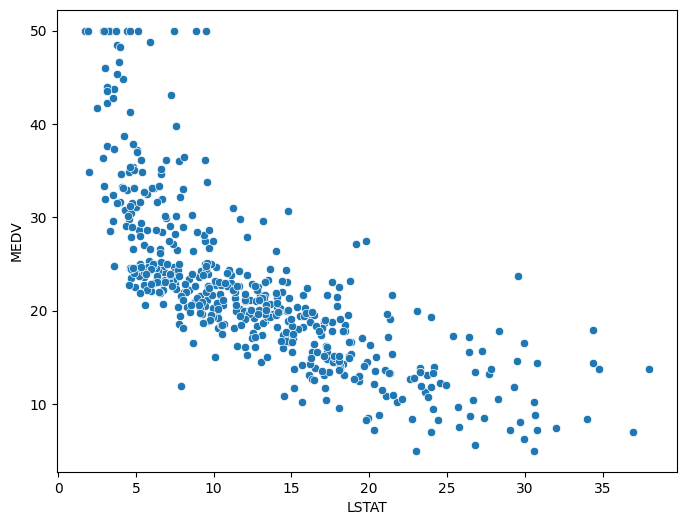

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df_boston)
plt.show()

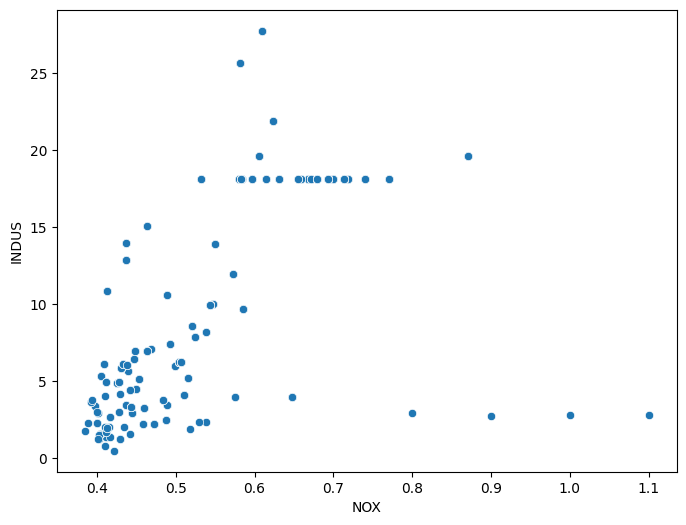

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df_boston)
plt.show()

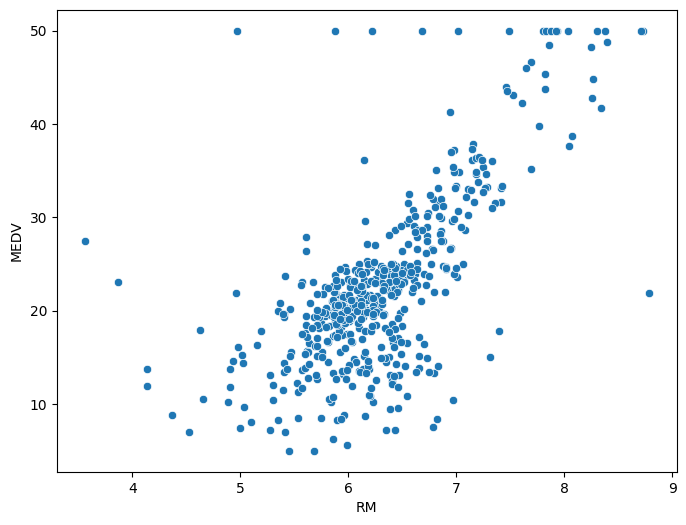

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RM', y='MEDV', data=df_boston)
plt.show()

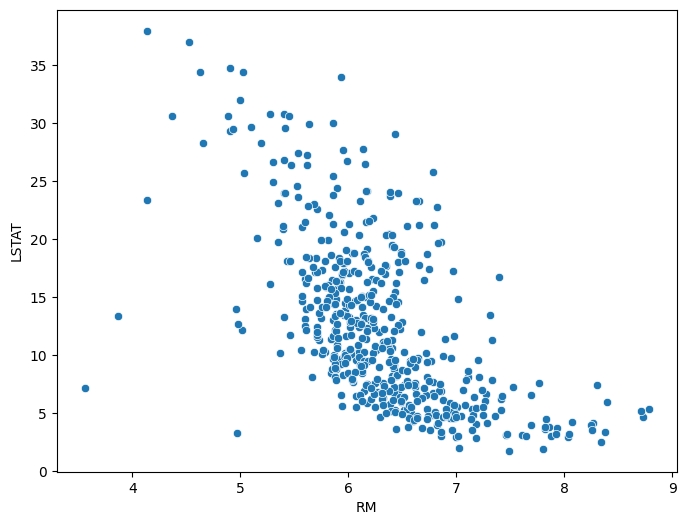

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RM', y='LSTAT', data=df_boston)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
correlation_matrix = df_boston.cov().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='hot')
plt.yticks(rotation=0)
plt.show()

In [ ]:
df_boston.cov().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,83.98,-28.23,21.42,-0.14,0.53,-1.13,83.75,-6.61,43.99,815.29,15.77,-277.98,25.52,-29.83
ZN,-28.23,551.16,-87.15,-0.27,-1.26,5.26,-371.14,32.53,-65.37,-1247.90,-8.31,393.45,-70.52,77.20
INDUS,21.42,-87.15,47.29,0.11,0.58,-1.91,123.54,-10.18,35.90,832.19,3.36,-226.92,29.93,-30.38
CHAS,-0.14,-0.27,0.11,0.06,0.00,0.02,0.61,-0.05,-0.01,-1.45,-0.09,1.07,-0.09,0.40
NOX,0.53,-1.26,0.58,0.00,0.01,-0.02,2.35,-0.18,0.59,12.69,0.16,-3.75,0.46,-0.44
RM,-1.13,5.26,-1.91,0.02,-0.02,0.49,-4.72,0.30,-1.32,-34.68,-0.36,8.52,-3.09,4.46
AGE,83.75,-371.14,123.54,0.61,2.35,-4.72,784.68,-43.91,110.93,2381.65,14.99,-698.01,120.12,-96.69
DIS,-6.61,32.53,-10.18,-0.05,-0.18,0.30,-43.91,4.39,-9.03,-188.27,-0.85,55.92,-7.45,4.80
RAD,43.99,-65.37,35.90,-0.01,0.59,-1.32,110.93,-9.03,75.78,1329.72,6.34,-355.45,30.73,-30.42
TAX,815.29,-1247.90,832.19,-1.45,12.69,-34.68,2381.65,-188.27,1329.72,28199.19,145.85,-6784.94,654.72,-720.70


In [ ]:
df_boston.MEDV.value_counts()

2    296
1    215
Name: MEDV, dtype: int64

In [23]:
X=df_boston.iloc[:,0:13]
#y=df_boston.PRICE
y=df_boston.MEDV

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
x_train=x_train.values
y_train=y_train.values

x_test=x_test.values
y_test=y_test.values

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
rf=RandomForestClassifier(n_estimators=42)
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(random_state=42)
svm=SVC(kernel='rbf',probability=True)

In [ ]:
def classifier(clf):
  model=clf
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  y_pred_prob=model.predict_proba(x_test)
  cm=confusion_matrix(y_test,y_pred)

  accuracy=accuracy_score(y_test,y_pred)
  print('Accuracy : ', accuracy )
  recall = recall_score(y_test,y_pred)
  print('Recall : ', recall )
  precision = precision_score(y_test, y_pred)
  print('Precision : ', precision )
  f1 = f1_score(y_test, y_pred)
  print('F1_Score : ', f1 )

  sensitivity = cm[0,0]/(cm[0,1]+cm[0,0])
  print('Sensitivity/Recall/TPR/Detection Rate : ', sensitivity )
  specificity = cm[1,1]/(cm[1,1]+cm[1,0])
  print('Specificity : ', specificity )
  FPR= cm[1,0]/(cm[1,0]+cm[1,1])
  print('FPR : ', FPR )
  TNR= cm[1,1]/(cm[0,1]+cm[1,1])
  print('Negative Precision / TNR: ', TNR)
  error= 1-accuracy
  print('Error : ', error )
  roc_auc=roc_auc_score(y_test, y_pred)
  print('ROC_AUC Score : ', roc_auc )


  label=['Low','High']
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
  plt.figure(figsize=(1000, 800), dpi=700)
  disp.plot(cmap='hot_r',colorbar=True)
  plt.grid(False)
  plt.show()

  return y_pred_prob, roc_auc

Accuracy :  0.8831168831168831
Recall :  0.8493150684931506
Precision :  0.8985507246376812
F1_Score :  0.8732394366197183
Sensitivity/Recall/TPR/Detection Rate :  0.8493150684931506
Specificity :  0.9135802469135802
FPR :  0.08641975308641975
Negative Precision / TNR:  0.8705882352941177
Error :  0.11688311688311692
ROC_AUC Score :  0.8814476577033656


<Figure size 700000x560000 with 0 Axes>

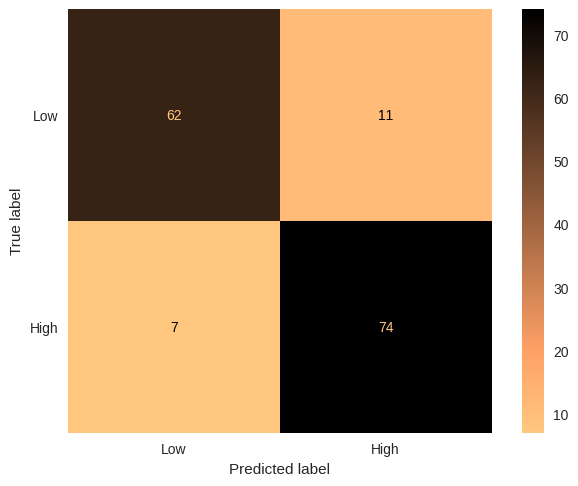

In [ ]:
model=rf
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob_rf=model.predict_proba(x_test)
cm=confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ', accuracy )
recall = recall_score(y_test,y_pred)
print('Recall : ', recall )
precision = precision_score(y_test, y_pred)
print('Precision : ', precision )
f1 = f1_score(y_test, y_pred)
print('F1_Score : ', f1 )

sensitivity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Sensitivity/Recall/TPR/Detection Rate : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Specificity : ', specificity )
FPR= cm[1,0]/(cm[1,0]+cm[1,1])
print('FPR : ', FPR )
TNR= cm[1,1]/(cm[0,1]+cm[1,1])
print('Negative Precision / TNR: ', TNR)
error= 1-accuracy
print('Error : ', error )
roc_auc_rf=roc_auc_score(y_test, y_pred)
print('ROC_AUC Score : ', roc_auc_rf )


label=['Low','High']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
plt.figure(figsize=(1000, 800), dpi=700)
disp.plot(cmap='copper_r',colorbar=True)
plt.grid(False)
plt.show()

Accuracy :  0.7792207792207793
Recall :  0.7808219178082192
Precision :  0.76
F1_Score :  0.7702702702702703
Sensitivity/Recall/TPR/Detection Rate :  0.7808219178082192
Specificity :  0.7777777777777778
FPR :  0.2222222222222222
Negative Precision / TNR:  0.7974683544303798
Error :  0.22077922077922074
ROC_AUC Score :  0.7792998477929984


<Figure size 700000x560000 with 0 Axes>

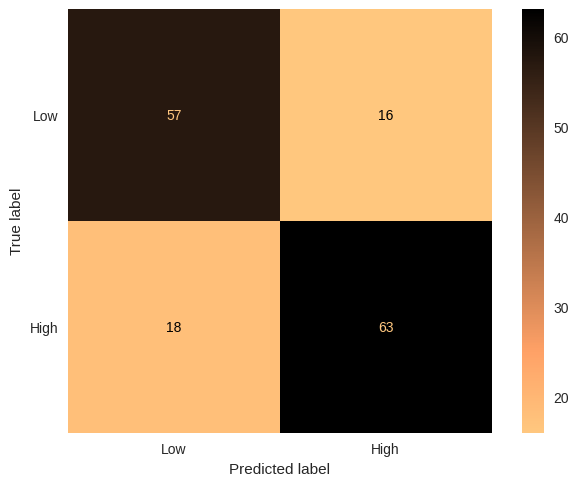

In [ ]:
model=dt
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob_dt=model.predict_proba(x_test)
cm=confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ', accuracy )
recall = recall_score(y_test,y_pred)
print('Recall : ', recall )
precision = precision_score(y_test, y_pred)
print('Precision : ', precision )
f1 = f1_score(y_test, y_pred)
print('F1_Score : ', f1 )

sensitivity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Sensitivity/Recall/TPR/Detection Rate : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Specificity : ', specificity )
FPR= cm[1,0]/(cm[1,0]+cm[1,1])
print('FPR : ', FPR )
TNR= cm[1,1]/(cm[0,1]+cm[1,1])
print('Negative Precision / TNR: ', TNR)
error= 1-accuracy
print('Error : ', error )
roc_auc_dt=roc_auc_score(y_test, y_pred)
print('ROC_AUC Score : ', roc_auc_dt )


label=['Low','High']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
plt.figure(figsize=(1000, 800), dpi=700)
disp.plot(cmap='copper_r',colorbar=True)
plt.grid(False)
plt.show()

Accuracy :  0.7207792207792207
Recall :  0.5205479452054794
Precision :  0.8260869565217391
F1_Score :  0.6386554621848739
Sensitivity/Recall/TPR/Detection Rate :  0.5205479452054794
Specificity :  0.9012345679012346
FPR :  0.09876543209876543
Negative Precision / TNR:  0.6759259259259259
Error :  0.27922077922077926
ROC_AUC Score :  0.710891256553357


<Figure size 700000x560000 with 0 Axes>

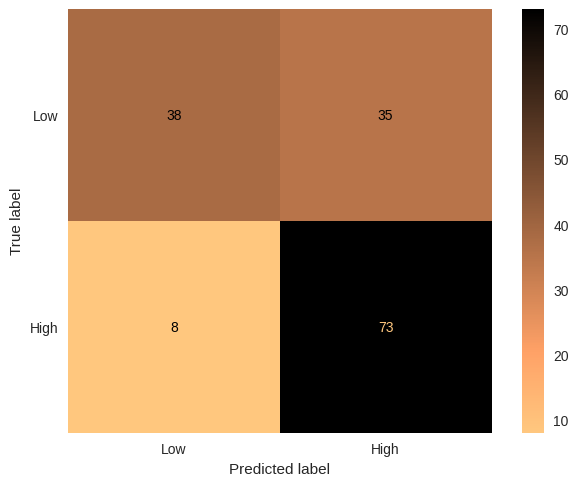

In [ ]:
model=svm
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob_svm=model.predict_proba(x_test)
cm=confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ', accuracy )
recall = recall_score(y_test,y_pred)
print('Recall : ', recall )
precision = precision_score(y_test, y_pred)
print('Precision : ', precision )
f1 = f1_score(y_test, y_pred)
print('F1_Score : ', f1 )

sensitivity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Sensitivity/Recall/TPR/Detection Rate : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Specificity : ', specificity )
FPR= cm[1,0]/(cm[1,0]+cm[1,1])
print('FPR : ', FPR )
TNR= cm[1,1]/(cm[0,1]+cm[1,1])
print('Negative Precision / TNR: ', TNR)
error= 1-accuracy
print('Error : ', error )
roc_auc_svm=roc_auc_score(y_test, y_pred)
print('ROC_AUC Score : ', roc_auc_svm )


label=['Low','High']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
plt.figure(figsize=(1000, 800), dpi=700)
disp.plot(cmap='copper_r',colorbar=True)
plt.grid(False)
plt.show()

Accuracy :  0.8246753246753247
Recall :  0.726027397260274
Precision :  0.8833333333333333
F1_Score :  0.7969924812030076
Sensitivity/Recall/TPR/Detection Rate :  0.726027397260274
Specificity :  0.9135802469135802
FPR :  0.08641975308641975
Negative Precision / TNR:  0.7872340425531915
Error :  0.17532467532467533
ROC_AUC Score :  0.8198038220869271


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 700000x560000 with 0 Axes>

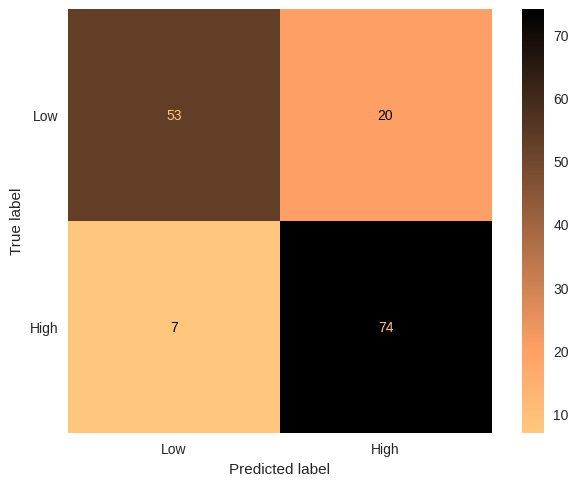

In [ ]:
model=lr
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob_lr=model.predict_proba(x_test)
cm=confusion_matrix(y_test,y_pred)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ', accuracy )
recall = recall_score(y_test,y_pred)
print('Recall : ', recall )
precision = precision_score(y_test, y_pred)
print('Precision : ', precision )
f1 = f1_score(y_test, y_pred)
print('F1_Score : ', f1 )

sensitivity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Sensitivity/Recall/TPR/Detection Rate : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Specificity : ', specificity )
FPR= cm[1,0]/(cm[1,0]+cm[1,1])
print('FPR : ', FPR )
TNR= cm[1,1]/(cm[0,1]+cm[1,1])
print('Negative Precision / TNR: ', TNR)
error= 1-accuracy
print('Error : ', error )
roc_auc_lr=roc_auc_score(y_test, y_pred)
print('ROC_AUC Score : ', roc_auc_lr )


label=['Low','High']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
plt.figure(figsize=(1000, 800), dpi=700)
disp.plot(cmap='copper_r',colorbar=True)
plt.grid(False)
plt.show()

In [9]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 1 73]
 [ 2 81]]


<ipython-input-128-27626da4dcae>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


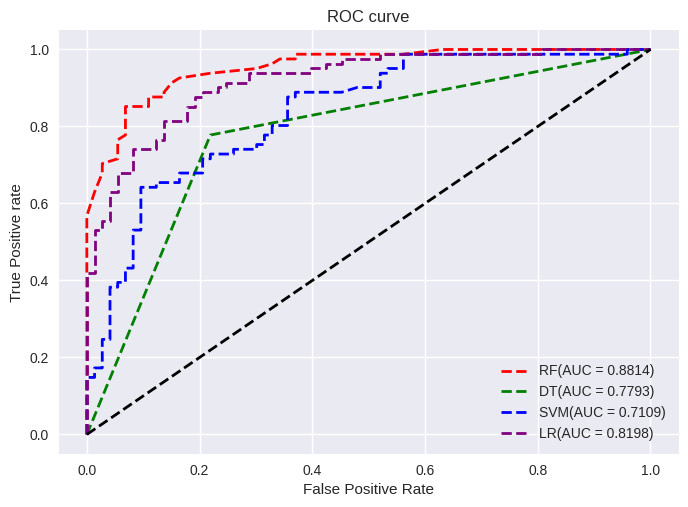

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_rf[:,1], pos_label=2)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob_dt[:,1], pos_label=2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob_svm[:,1], pos_label=2)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob_lr[:,1], pos_label=2)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=2)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red',lw=2,label='RF(AUC = %0.4f)' % roc_auc_rf)
plt.plot(fpr2, tpr2, linestyle='--',color='green',lw=2, label='DT(AUC = %0.4f)' % roc_auc_dt)
plt.plot(fpr3, tpr3, linestyle='--',color='blue',lw=2, label='SVM(AUC = %0.4f)' % roc_auc_svm)
plt.plot(fpr4, tpr4, linestyle='--',color='purple',lw=2, label='LR(AUC = %0.4f)' % roc_auc_lr)

plt.plot(p_fpr, p_tpr, linestyle='--', color='black',lw=2)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [14]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [13]:
import statsmodels.formula.api as smf

# Fit model
rf = smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df_boston)
result = rf.fit()

# Make predictions

#predictions = result.predict(x_test)

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     97.84
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          9.00e-128
Time:                        09:21:49   Log-Likelihood:                -1531.7
No. Observations:                 511   AIC:                             3091.
Df Residuals:                     497   BIC:                             3151.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1997      4.131      3.921      0.0

In [33]:
df_boston.shape

(511, 14)

In [15]:
import statsmodels.formula.api as smf

# Fit model
rf = smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df_boston)
result = rf.fit()

# Make predictions

#predictions = result.predict(x_test)

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     50.50
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.51e-82
Time:                        09:22:03   Log-Likelihood:                -149.27
No. Observations:                 511   AIC:                             326.5
Df Residuals:                     497   BIC:                             385.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5386      0.276      9.192      0.0

In [28]:
rf=RandomForestClassifier(n_estimators=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=42)

In [26]:
feature_list=list(X)

In [ ]:
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
#rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');